### Importacion de los Datos

In [ ]:
import numpy as np
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 40.1 MB/s 
     |████████████████████████████████| 16.7 MB 41.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRABAJO EDA/calles_de_medellin_con_acoso.csv',sep =';')

In [ ]:
df.head()

,name,origin,destination,length,oneway,harassmentRisk,geometry
0,Calle 10,"(-75.5728593, 6.2115169)","(-75.5724985, 6.2113756)",42.867,True,0.526539,"LINESTRING (-75.5728593 6.2115169, -75.5724984..."
1,Calle 10,"(-75.5705202, 6.2106275)","(-75.570427, 6.2105879)",11.204,True,0.414356,"LINESTRING (-75.5705202 6.2106275, -75.570427 ..."
2,Carrera 43A,"(-75.5705202, 6.2106275)","(-75.5705604, 6.2105262)",12.109,True,0.526539,"LINESTRING (-75.5705202 6.2106275, -75.5705604..."
3,Carrera 41,"(-75.5687719, 6.2099661)","(-75.5688022, 6.2098867)",9.443,True,0.302173,"LINESTRING (-75.5687719 6.2099661, -75.5688021..."
4,Calle 10,"(-75.5687719, 6.2099661)","(-75.568715, 6.2099443)",6.741,True,0.302173,"LINESTRING (-75.5687719 6.2099661, -75.568715 ..."


In [ ]:
print(df.shape)
df.info() #identificar valores faltantes y tipo de obj
df.describe() #resumen est de aquellas var numericas

(68749, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68749 entries, 0 to 68748
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            45190 non-null  object 
 1   origin          68749 non-null  object 
 2   destination     68749 non-null  object 
 3   length          68749 non-null  float64
 4   oneway          68749 non-null  bool   
 5   harassmentRisk  52658 non-null  float64
 6   geometry        68749 non-null  object 
dtypes: bool(1), float64(2), object(4)
memory usage: 3.2+ MB


,length,harassmentRisk
count,68749.000000,52658.000000
mean,83.624469,0.843508
std,153.214511,0.224897
min,0.278000,0.000000
25%,27.946000,0.863370
50%,55.377000,0.931258
75%,94.857000,0.958817
max,7988.838000,1.000000


### Forma 2

In [ ]:
!pip install geopandas

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps

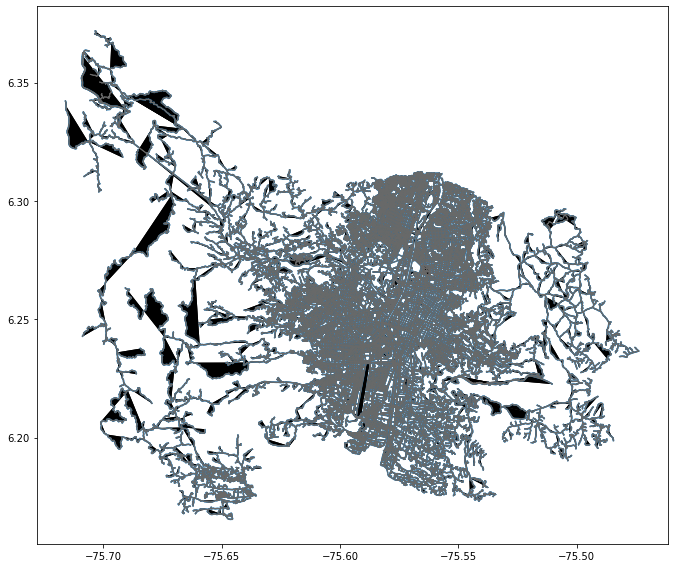

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

#load data
edges = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRABAJO EDA/calles_de_medellin_con_acoso.csv',sep=';')
edges['geometry'] = edges['geometry'].apply(wkt.loads)
edges = gpd.GeoDataFrame(edges)

area = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRABAJO EDA/calles_de_medellin_con_acoso.csv',sep=';')
area['geometry'] = area['geometry'].apply(wkt.loads)
area = gpd.GeoDataFrame(area)

#Create plot
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

plt.tight_layout()